# Build MI Network from types and samples

## Libs

In [83]:
! git add .

^C


In [2]:
import os
import scanpy as sc
from itertools import compress
import pandas as pd
backup_dir = '/root/datos/maestria/netopaas/luca_explore/surgeries/'
backup_h5ds = os.listdir(backup_dir)

## Check datas

Check for which dests we have combined embeds, and just the query objects

In [3]:
latent_h5ds = list(compress(backup_h5ds,['latent' in h5d for h5d in backup_h5ds]))
query_h5ds = list(compress(backup_h5ds,['query' in h5d for h5d in backup_h5ds]))
combined_h5ds = list(compress(backup_h5ds,['combined' in h5d for h5d in backup_h5ds]))

In [4]:
print(len(combined_h5ds))
combined_h5ds

19


['combined_Wu.h5ad',
 'combined_Zilionis.h5ad',
 'combined_Adams.h5ad',
 'combined_UKIM-V-2.h5ad',
 'combined_Maynard.h5ad',
 'combined_Madissoon.h5ad',
 'combined_Lambrechts.h5ad',
 'combined_Travaglini.h5ad',
 'combined_Emilio.h5ad',
 'combined_Leader.h5ad',
 'combined_He.h5ad',
 'combined_Habermann.h5ad',
 'combined_Mayr.h5ad',
 'combined_Reyfman.h5ad',
 'combined_Chen.h5ad',
 'combined_UKIM-V.h5ad',
 'combined_Goveia.h5ad',
 'combined_Kim.h5ad',
 'combined_Laughney.h5ad']

In [5]:
query_h5ds

['query_Leader.h5ad',
 'query_Laughney.h5ad',
 'query_Reyfman.h5ad',
 'query_emb_Leader.h5ad',
 'query_Adams.h5ad',
 'query_Habermann.h5ad',
 'query_Goveia.h5ad',
 'query_UKIM-V.h5ad',
 'query_He.h5ad',
 'query_Madissoon.h5ad',
 'query_Travaglini.h5ad',
 'query_Chen.h5ad',
 'query_Lambrechts.h5ad',
 'query_Mayr.h5ad',
 'query_Maynard.h5ad',
 'query_Zilionis.h5ad',
 'query_Kim.h5ad',
 'query_Wu.h5ad',
 'query_Emilio.h5ad']

In [6]:
latent_h5ds

['latent_Madissoon.h5ad',
 'latent_Maynard.h5ad',
 'latent_Emilio.h5ad',
 'latent_Chen.h5ad',
 'latent_UKIM-V-2.h5ad',
 'latent_Zilionis.h5ad',
 'latent_Wu.h5ad',
 'latent_Reyfman.h5ad',
 'latent_Leader.h5ad',
 'latent_Laughney.h5ad',
 'latent_Travaglini.h5ad',
 'latent_Lambrechts.h5ad',
 'latent_Goveia.h5ad',
 'latent_UKIM-V.h5ad']

## Get missing combined h5ds

In [7]:
dsets = pd.read_csv('samplesheet_scrnaseq_preprocessing.csv')
dsets2 = pd.read_csv('samplesheet_scrnaseq_preprocessing2.csv')

In [8]:
dsets = dsets.rename(columns={'no_cancer': 'no_cancer_or_filter'})

In [9]:
dsets2.loc[dsets2.id == 'UKIM-V-2', 'no_cancer_or_filter'] = False

Mark the dsets for which we have combined embeds

We make a table of the names we have h5ad for and add a column to the data to do join

In [10]:
dsets = pd.concat([dsets, dsets2], axis=0)

In [11]:
names = [h5d[:-5].split('_')[1] for h5d in combined_h5ds]
names = pd.DataFrame({'Names':names})
names['Annots'] = True


dsets['Names'] = [h5d.split('_')[0] for h5d in dsets.id]

dsets = pd.merge(dsets, names, how='left', on='Names')
dsets.Annots = dsets.Annots.fillna(False)

Check if there are some datasets not annotated, to go annotate them

In [12]:
dsets.query('no_cancer_or_filter == False & Annots == False')

,id,input_adata,min_counts,max_counts,min_genes,max_genes,max_pct_mito,batch_key,run_solo,no_cancer_or_filter,chem,assembly,Names,Annots


Reduce to just cancer biopsies

In [13]:
dsets = dsets.query('no_cancer_or_filter == False')

Append the dois to have in one place

In [14]:
dois = pd.read_csv('study_dois.csv')
dois['Names'] = [doi.split('_')[0] for doi in dois.study ]
dsets = pd.merge(dsets, dois, how='left', on='Names')
dsets

,id,input_adata,min_counts,max_counts,min_genes,max_genes,max_pct_mito,batch_key,run_solo,no_cancer_or_filter,chem,assembly,Names,Annots,study,doi
0,Chen_Zhang_2020_NSCLC,data/12_input_adatas/Chen_Zhang_2020_NSCLC.h5ad,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8,Chen,True,Chen_Zhang_2020,10.1186/s13059-020-02064-6
1,Goveia_Carmeliet_2020_NSCLC,data/12_input_adatas/goveia_carmeliet_2020_nsc...,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8,Goveia,True,Goveia_Carmeliet_2020,10.1016/j.ccell.2019.12.001
2,Kim_Lee_2020_LUAD,data/12_input_adatas/Kim_Lee_2020_LUAD.h5ad,1000,35000,300,10000,20,sample,True,False,10x-3'-v2,GRCh8,Kim,True,Kim_Lee_2020,10.1038/s41467-020-16164-1
3,He_Fan_2021_LUAD,data/12_input_adatas/He_Fan_2021_LUAD.h5ad,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8?,He,True,He_Fan_2021,10.1038/s41388-020-01528-0
4,Lambrechts_2018_LUAD_6149v1,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,200,10000,15,sample,True,False,10x-3'-v1,hg19,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
5,Lambrechts_2018_LUAD_6149v2,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,250,10000,20,sample,True,False,10x-3'-v2,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
6,Lambrechts_2018_LUAD_6653,data/12_input_adatas/lambrechts_2018_luad_6653...,1200,40000,250,10000,20,sample,True,False,NaN,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
7,Laughney_Massague_2020_NSCLC,data/12_input_adatas/laughney_massague_2020_ns...,1800,40000,500,10000,20,sample,True,False,10x-3'-v2,GRCh8,Laughney,True,Laughney_Massague_2020,10.1038/s41591-019-0750-6
8,Maynard_Bivona_2020_NSCLC,data/12_input_adatas/maynard2020.h5ad,20000,20000000,600,20000,30,sample,False,False,NaN,NaN,Maynard,True,Maynard_Bivona_2020,10.1016/j.cell.2020.07.017
9,UKIM-V,data/12_input_adatas/batch1_3patients.h5ad,2000,100000,200,8000,30,sample,True,False,NaN,NaN,UKIM-V,True,UKIM-V,10.1101/2022.05.09.491204


In [47]:
dsets.to_csv('dsets.csv')

## Import h5ds

These would be the keys of interest for the matrix

In [15]:
chen.obs['Level_5_transfered_label'].cat.categories

NameError: name 'chen' is not defined

In [23]:
chen_name = [el for el in combined_h5ds if 'hen' in el][0]
chen = sc.read_h5ad(f'{backup_dir}{chen_name}')
chen = chen[chen.obs['ref_or_query']=='query']
chen.obs_keys

<bound method AnnData.obs_keys of View of AnnData object with n_obs × n_vars = 131287 × 30
    obs: 'sample', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'sex', 'ethnicity', 'mixed_ethnicity', 'smoking_status', 'BMI', 'condition', 'subject_type', 'sample_type', 'single_cell_platform', "3'_or_5'", 'sequencing_platform', 'cell_ranger_version', 'fresh_or_frozen', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_highest_res', 'n_genes', 'log10_total_counts', 'mito_frac', 'ribo_frac', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'scanvi_label', 'leiden_1', 'leiden_2', 'leiden_3', 'anatomical_region_ccf_score', 'entropy_study_leiden_3', 'entropy_dataset_leiden_3', 'entropy_subject_ID_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clea

In [24]:
print(chen.obs['sample'].astype('category'))
chen.obs['condition'].astype('category')

AAACCCAAGAGCCATG-1_0     NSCLC-10
AAACCCAAGATTAGAC-1_0     NSCLC-10
AAACCCAAGGTCGCCT-1_0     NSCLC-10
AAACCCAAGTCATTGC-1_0     NSCLC-10
AAACCCACACGGATCC-1_0     NSCLC-10
                           ...   
TTTGTCATCTCCAACC-1_10     NSCLC-5
TTTGTCATCTGAGTGT-1_10     NSCLC-5
TTTGTCATCTGATACG-1_10     NSCLC-5
TTTGTCATCTGCAAGT-1_10     NSCLC-5
TTTGTCATCTTGTCAT-1_10     NSCLC-5
Name: sample, Length: 131287, dtype: category
Categories (11, object): ['NSCLC-1', 'NSCLC-2', 'NSCLC-3', 'NSCLC-4', ..., 'NSCLC-8', 'NSCLC-9', 'NSCLC-10', 'NSCLC-11']


AAACCCAAGAGCCATG-1_0     NSCLC
AAACCCAAGATTAGAC-1_0     NSCLC
AAACCCAAGGTCGCCT-1_0     NSCLC
AAACCCAAGTCATTGC-1_0     NSCLC
AAACCCACACGGATCC-1_0     NSCLC
                         ...  
TTTGTCATCTCCAACC-1_10    NSCLC
TTTGTCATCTGAGTGT-1_10    NSCLC
TTTGTCATCTGATACG-1_10    NSCLC
TTTGTCATCTGCAAGT-1_10    NSCLC
TTTGTCATCTTGTCAT-1_10    NSCLC
Name: condition, Length: 131287, dtype: category
Categories (1, object): ['NSCLC']

In [25]:
chen.obs['tissue']

AAACCCAAGAGCCATG-1_0     lung
AAACCCAAGATTAGAC-1_0     lung
AAACCCAAGGTCGCCT-1_0     lung
AAACCCAAGTCATTGC-1_0     lung
AAACCCACACGGATCC-1_0     lung
                         ... 
TTTGTCATCTCCAACC-1_10    lung
TTTGTCATCTGAGTGT-1_10    lung
TTTGTCATCTGATACG-1_10    lung
TTTGTCATCTGCAAGT-1_10    lung
TTTGTCATCTTGTCAT-1_10    lung
Name: tissue, Length: 131287, dtype: category
Categories (1, object): ['lung']

In [37]:
chen.obs['origin']

AAACCCAAGAGCCATG-1_0     tumor_primary
AAACCCAAGATTAGAC-1_0     tumor_primary
AAACCCAAGGTCGCCT-1_0     tumor_primary
AAACCCAAGTCATTGC-1_0     tumor_primary
AAACCCACACGGATCC-1_0     tumor_primary
                             ...      
TTTGTCATCTCCAACC-1_10    tumor_primary
TTTGTCATCTGAGTGT-1_10    tumor_primary
TTTGTCATCTGATACG-1_10    tumor_primary
TTTGTCATCTGCAAGT-1_10    tumor_primary
TTTGTCATCTTGTCAT-1_10    tumor_primary
Name: origin, Length: 131287, dtype: category
Categories (1, object): ['tumor_primary']

Save all AnnDatas into a dict, and check that they have annotations

In [16]:
adatas = {}

for name in dsets.Names:
    adata = sc.read_h5ad(f'{backup_dir}combined_{name}.h5ad')
    print(name)
    assert len([element for element in adata.obs_keys() if 'Level' in element] ) > 0
    adata = adata[adata.obs['ref_or_query']=='query']
    
    adatas[name] = adata

Chen
Goveia
Kim
He
Lambrechts
Lambrechts
Lambrechts
Laughney
Maynard
UKIM-V
Wu
Zilionis
UKIM-V-2


## Groupings

In [18]:
group_before = None
groups = None

for name, adata in adatas.items():
    print(name)
    group = adata.obs.groupby(['Level_2_transfered_label', 'sample']).size()
    sample_inds = [sample for sample in group.index.get_level_values('sample')]
    group.index = group.index.set_levels([f'{sample}_{name}' for sample in sample_inds],
                                 level=1, verify_integrity=False)
    
    group_before = group
    if group_before is None:
        groups = group
    else:
        groups = pd.concat([group_before, groups])
        
groups

Chen
Goveia
Kim
He
Lambrechts
Laughney
Maynard
UKIM-V
Wu
Zilionis
UKIM-V-2


Level_2_transfered_label  sample                     
Airway epithelium         P4_normal_adjacent_UKIM-V-2      56
                          P4_tumor_primary_UKIM-V-2        20
                          P5_normal_adjacent_UKIM-V-2      57
                          P5_tumor_primary_UKIM-V-2        35
                          P6_normal_adjacent_UKIM-V-2      27
                                                         ... 
Unknown                   NSCLC-7_Chen                    596
                          NSCLC-8_Chen                   2384
                          NSCLC-9_Chen                    997
                          NSCLC-10_Chen                  1459
                          NSCLC-11_Chen                  2874
Length: 2700, dtype: int64

### Start from here

In [ ]:
import os
import scanpy as sc
from itertools import compress
import pandas as pd
backup_dir = '/root/datos/maestria/netopaas/luca_explore/surgeries/'
backup_h5ds = os.listdir(backup_dir)

In [19]:
groups.to_csv('groups.csv')
# groups = pd.read_csv('groups.csv')

### Samples by type

In [20]:
groups

Level_2_transfered_label  sample                     
Airway epithelium         P4_normal_adjacent_UKIM-V-2      56
                          P4_tumor_primary_UKIM-V-2        20
                          P5_normal_adjacent_UKIM-V-2      57
                          P5_tumor_primary_UKIM-V-2        35
                          P6_normal_adjacent_UKIM-V-2      27
                                                         ... 
Unknown                   NSCLC-7_Chen                    596
                          NSCLC-8_Chen                   2384
                          NSCLC-9_Chen                    997
                          NSCLC-10_Chen                  1459
                          NSCLC-11_Chen                  2874
Length: 2700, dtype: int64

Check the distribution of nans across samples. And locate the
study that has the most nans: It is Maier

In [21]:
naners = groups.unstack().isnull()
count_nans = []
much_nans = []

for col in naners.columns:
    counter = sum(naners[col])
    if counter > 6:
        much_nans.append(col)
    count_nans.append(counter)

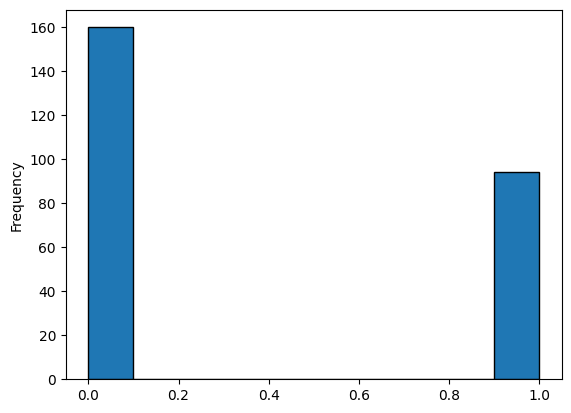

In [22]:
import matplotlib.pyplot as plt
data_series = pd.Series(count_nans)
data_series.plot(kind='hist', edgecolor='black')

plt.show()

Make a cutoff for only samples that have more than 1 cell of the type.

In [23]:
cutoff = pd.DataFrame(groups[groups > 1])
cutoff.groupby('Level_2_transfered_label').size()

Level_2_transfered_label
Airway epithelium      222
Alveolar epithelium    193
Blood vessels          182
Fibroblast lineage     200
Lymphatic EC            90
Lymphoid               248
Mesothelium             25
Myeloid                248
Smooth muscle          125
Submucosal Gland         4
Unknown                243
dtype: int64

### Cells by type

In [24]:
cutoff.groupby('Level_2_transfered_label').sum()

,0
Level_2_transfered_label,
Airway epithelium,86278
Alveolar epithelium,40052
Blood vessels,36514
Fibroblast lineage,14115
Lymphatic EC,4070
Lymphoid,349122
Mesothelium,389
Myeloid,245525
Smooth muscle,1538


### Total cells:

In [25]:
cutoff.groupby('Level_2_transfered_label').sum().sum()

0    827888
dtype: int64

## Matrix of Samples by type

Now to get the mutual information we need to have a matrix where 
we can get the pointwise mutual information (relative entropy) of any
two cell types 
$$
\log{\frac{p(x,y)}{p(x)p(y)}}
$$.
To then get the expected value of those:
$$
\sum_{X,Y}{p(x,y)\log{\frac{p(x,y)}{p(x)p(y)}}}
$$.

The idea was to get a discrete mutual information, because we are getting counts of cells being present in the tisse to study.
Nevertheless, a discrete mutual information would just be constraining the states to present or not present, or some
discrete states that would nevertheless be ordered and so the ranking the aracne does suddenly seems the same.

Definitely just having present or not present would give us no info because at this level the clusters almost always have at least one cell.

In [26]:
samp_type = groups.unstack().transpose()
samp_type

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Submucosal Gland,Unknown
sample,,,,,,,,,,,
1247_Lambrechts,2.0,70.0,31.0,11.0,0.0,122.0,1.0,105.0,0.0,NaN,1.0
BRONCHO_11_Kim,99.0,2.0,2.0,3.0,3.0,2222.0,0.0,733.0,0.0,0.0,78.0
BRONCHO_58_Kim,28.0,309.0,12.0,63.0,1.0,1693.0,0.0,509.0,11.0,0.0,70.0
BT1249_Lambrechts,12.0,0.0,0.0,38.0,0.0,24.0,0.0,30.0,2.0,NaN,6.0
BT1A_Lambrechts,58.0,3.0,0.0,4.0,0.0,244.0,0.0,98.0,0.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
patient_45_tumor_primary_Goveia,413.0,176.0,2682.0,115.0,105.0,239.0,0.0,423.0,27.0,NaN,1207.0
patient_46_normal_adjacent_Goveia,10.0,315.0,603.0,34.0,215.0,32.0,5.0,2614.0,1.0,NaN,48.0
patient_46_tumor_primary_Goveia,701.0,624.0,954.0,117.0,183.0,409.0,2.0,108.0,31.0,NaN,1272.0


Checking the Lambrechts we see that their samples have very few cells, and the submucosal gland cluster is strange so it wasn't trasnferred.
This just means that effectively there are no cells with submocusal glands inthose adatas se we just replace them with zeros.

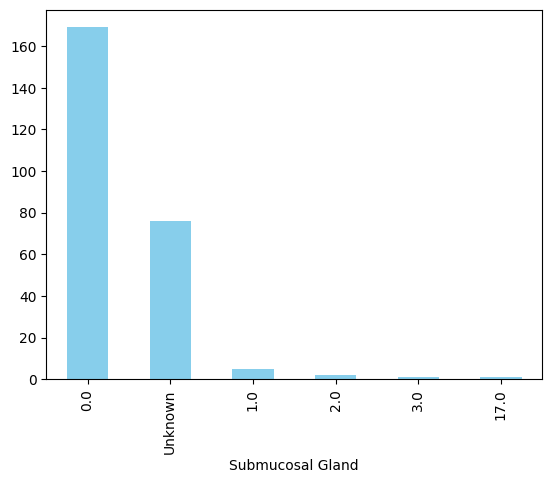

In [27]:
# Count the occurrences of each category
lol = samp_type['Submucosal Gland'].astype('category')
lol = lol.cat.add_categories('Unknown')
lol = lol.fillna('Unknown')

category_counts = lol.value_counts()

category_counts.plot(kind='bar', color='skyblue')
plt.show()

Most of it is 0's so we will remove that column. Also because our type annotation is very general,
we aren't getting very near to a limit of detection of our algorithm.
Though it would have to do with our uncertainty.

In [28]:
del samp_type['Submucosal Gland']

By the way the transfer of the labels is done, if the cluster is not present the label does not appear. So it would be like a 0.

In [29]:
samp_type = samp_type.fillna(0)
samp_type

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Unknown
sample,,,,,,,,,,
1247_Lambrechts,2.0,70.0,31.0,11.0,0.0,122.0,1.0,105.0,0.0,1.0
BRONCHO_11_Kim,99.0,2.0,2.0,3.0,3.0,2222.0,0.0,733.0,0.0,78.0
BRONCHO_58_Kim,28.0,309.0,12.0,63.0,1.0,1693.0,0.0,509.0,11.0,70.0
BT1249_Lambrechts,12.0,0.0,0.0,38.0,0.0,24.0,0.0,30.0,2.0,6.0
BT1A_Lambrechts,58.0,3.0,0.0,4.0,0.0,244.0,0.0,98.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...
patient_45_tumor_primary_Goveia,413.0,176.0,2682.0,115.0,105.0,239.0,0.0,423.0,27.0,1207.0
patient_46_normal_adjacent_Goveia,10.0,315.0,603.0,34.0,215.0,32.0,5.0,2614.0,1.0,48.0
patient_46_tumor_primary_Goveia,701.0,624.0,954.0,117.0,183.0,409.0,2.0,108.0,31.0,1272.0


### Export for ARACNE AP

We export in a format that can be used for ARACNE AP, which has the 'genes' in the rows and only considers Target/TF pairs

In [69]:
aracne_types = samp_type.transpose()
aracne_types = pd.concat([aracne_types, aracne_types])
aracne_types.astype(int)
aracne_types.columns.name = None
aracne_types.index.name = 'genes'
aracne_types

,1247_Lambrechts,BRONCHO_11_Kim,BRONCHO_58_Kim,BT1249_Lambrechts,BT1A_Lambrechts,BT1B_Lambrechts,BT1C_Lambrechts,BT2A_Lambrechts,BT2B_Lambrechts,EBUS_06_Kim,...,patient_41_normal_adjacent_Goveia,patient_41_tumor_primary_Goveia,patient_42_normal_adjacent_Goveia,patient_42_tumor_primary_Goveia,patient_45_normal_adjacent_Goveia,patient_45_tumor_primary_Goveia,patient_46_normal_adjacent_Goveia,patient_46_tumor_primary_Goveia,patient_50_normal_adjacent_Goveia,patient_50_tumor_primary_Goveia
genes,,,,,,,,,,,,,,,,,,,,,
Airway epithelium,2.0,99.0,28.0,12.0,58.0,60.0,35.0,88.0,90.0,437.0,...,9.0,1320.0,6.0,2.0,32.0,413.0,10.0,701.0,3.0,74.0
Alveolar epithelium,70.0,2.0,309.0,0.0,3.0,2.0,9.0,5.0,42.0,195.0,...,7.0,592.0,90.0,3.0,1.0,176.0,315.0,624.0,51.0,253.0
Blood vessels,31.0,2.0,12.0,0.0,0.0,0.0,4.0,2.0,13.0,2.0,...,442.0,3728.0,970.0,96.0,308.0,2682.0,603.0,954.0,949.0,1246.0
Fibroblast lineage,11.0,3.0,63.0,38.0,4.0,0.0,5.0,20.0,73.0,0.0,...,0.0,190.0,4.0,14.0,3.0,115.0,34.0,117.0,9.0,41.0
Lymphatic EC,0.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,...,96.0,142.0,570.0,25.0,155.0,105.0,215.0,183.0,135.0,328.0
Lymphoid,122.0,2222.0,1693.0,24.0,244.0,218.0,397.0,288.0,858.0,728.0,...,91.0,602.0,449.0,442.0,48.0,239.0,32.0,409.0,241.0,181.0
Mesothelium,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0
Myeloid,105.0,733.0,509.0,30.0,98.0,102.0,179.0,181.0,435.0,383.0,...,1322.0,295.0,1351.0,1578.0,1138.0,423.0,2614.0,108.0,1565.0,655.0
Smooth muscle,0.0,0.0,11.0,2.0,0.0,0.0,1.0,1.0,3.0,0.0,...,0.0,8.0,5.0,1.0,0.0,27.0,1.0,31.0,0.0,7.0


Index(['1247_Lambrechts', 'BRONCHO_11_Kim', 'BRONCHO_58_Kim',
       'BT1249_Lambrechts', 'BT1A_Lambrechts', 'BT1B_Lambrechts',
       'BT1C_Lambrechts', 'BT2A_Lambrechts', 'BT2B_Lambrechts', 'EBUS_06_Kim',
       ...
       'patient_41_normal_adjacent_Goveia', 'patient_41_tumor_primary_Goveia',
       'patient_42_normal_adjacent_Goveia', 'patient_42_tumor_primary_Goveia',
       'patient_45_normal_adjacent_Goveia', 'patient_45_tumor_primary_Goveia',
       'patient_46_normal_adjacent_Goveia', 'patient_46_tumor_primary_Goveia',
       'patient_50_normal_adjacent_Goveia', 'patient_50_tumor_primary_Goveia'],
      dtype='object', length=254)

In [72]:
tfs = aracne_types.index[0:10]

with open('tfs.txt', 'w') as f:
    for tf in tfs:
        f.write(str(tf) + '\n')

In [73]:
! cat tfs.txt

Airway epithelium
Alveolar epithelium
Blood vessels
Fibroblast lineage
Lymphatic EC
Lymphoid
Mesothelium
Myeloid
Smooth muscle
Unknown


In [76]:
aracne_types.to_csv('matrix.txt', sep='\t')

In [77]:
! head matrix.txt

genes	1247_Lambrechts	BRONCHO_11_Kim	BRONCHO_58_Kim	BT1249_Lambrechts	BT1A_Lambrechts	BT1B_Lambrechts	BT1C_Lambrechts	BT2A_Lambrechts	BT2B_Lambrechts	EBUS_06_Kim	EBUS_10_Kim	EBUS_12_Kim	EBUS_13_Kim	EBUS_15_Kim	EBUS_19_Kim	EBUS_28_Kim	EBUS_49_Kim	EBUS_51_Kim	EFFUSION_06_Kim	EFFUSION_11_Kim	EFFUSION_12_Kim	EFFUSION_13_Kim	EFFUSION_64_Kim	GSM3516662_Laughney	GSM3516663_Laughney	GSM3516664_Laughney	GSM3516665_Laughney	GSM3516666_Laughney	GSM3516667_Laughney	GSM3516668_Laughney	GSM3516669_Laughney	GSM3516670_Laughney	GSM3516671_Laughney	GSM3516672_Laughney	GSM3516673_Laughney	GSM3516674_Laughney	GSM3516675_Laughney	GSM3516676_Laughney	GSM3516677_Laughney	GSM3516678_Laughney	GSM4453576_Wu	GSM4453577_Wu	GSM4453578_Wu	GSM4453579_Wu	GSM4453580_Wu	GSM4453581_Wu	GSM4453582_Wu	GSM4453583_Wu	GSM4453584_Wu	GSM4453585_Wu	GSM4453586_Wu	GSM4453587_Wu	GSM4453588_Wu	GSM4453589_Wu	GSM4453590_Wu	GSM4453591_Wu	GSM4453592_Wu	GSM4453593_Wu	GSM4453594_Wu	GSM4453595_Wu	GSM4453596_Wu	GSM4453597_Wu	GSM4453598_Wu	

We use [ARACNE-AP](https://github.com/califano-lab/ARACNe-AP/tree/master) because it is fast 
and we dont need many libraries. Just JAVA

First we must calculate the threshold

In [78]:
! java -Xmx5G -jar /root/host_home/ARACNe-AP/dist/aracne.jar -e matrix.txt  -o outputFolder \
    --tfs tfs.txt --pvalue 1E-8 --seed 1 --nobootstrap --nodpi \
    --calculateThreshold

Finding threshold for 254 samples
Parameters for fitted threshold function: [0.09672301068900926, 6.225412313445222E-6]
MI threshold: 0.11170910262715995


In [79]:
! java -Xmx5G -jar /root/host_home/ARACNe-AP/dist/aracne.jar -e matrix.txt  -o outputFolder \
    --tfs tfs.txt --pvalue 1E-8 --seed 1 --nobootstrap --nodpi

MI threshold file is present
Calculate network from: matrix.txt
TFs processed: 10
Time elapsed for calculating MI: 0 sec

Edges removed by DPI:	0
Final Network size:	23
Total time elapsed: 0 sec


In [80]:
!cat outputFolder/nobootstrap_network.txt

Regulator	Target	MI
Lymphatic EC	Blood vessels	0.2548429933746341
Lymphatic EC	Myeloid	0.11402258433070411
Lymphoid	Alveolar epithelium	0.11453408820865096
Lymphoid	Myeloid	0.17747374716515907
Unknown	Alveolar epithelium	0.13703129801696612
Unknown	Airway epithelium	0.22518308293431488
Alveolar epithelium	Lymphoid	0.11453408820865185
Alveolar epithelium	Unknown	0.13703129801696612
Alveolar epithelium	Airway epithelium	0.11947828749822431
Alveolar epithelium	Myeloid	0.12418377909800515
Blood vessels	Lymphatic EC	0.28237782131520817
Blood vessels	Smooth muscle	0.23642517864264434
Blood vessels	Myeloid	0.15445297658550228
Blood vessels	Fibroblast lineage	0.3202744047026558
Smooth muscle	Blood vessels	0.2081188843891475
Smooth muscle	Fibroblast lineage	0.27089770491462417
Airway epithelium	Unknown	0.23103608471959003
Myeloid	Lymphatic EC	0.1125293287963105
Myeloid	Lymphoid	0.17747374716515907
Myeloid	Alveolar epithelium	0.12418377909800515
Myeloid	Blood vessels	0.17572637686214776
Fibrobla

### MI with sklearn

In [84]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score

We won't use the function `mutual_info_score` because it is for labels assigned to a same observation. Which is not the case 
here because we are counting ocurrence of cells and no two cells should have more than one type.

So we use the `mutual_info_classif` though it is pretty unstable and does not use the same method than ARACNE.

**TODO:** compare the two methods, apparently n_neighbours is better at handling missing values?!?!?

To use discrete values we will rank the cell type in every sample based on a normalization by its total number of cells.

In [174]:
cells_x_sample = samp_type.transpose().sum().to_numpy()
percents = (samp_type / cells_x_sample.reshape(-1,1))*10
percents = percents.astype(int)
percents

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Unknown
sample,,,,,,,,,,
1247_Lambrechts,0,2,0,0,0,3,0,3,0,0
BRONCHO_11_Kim,0,0,0,0,0,7,0,2,0,0
BRONCHO_58_Kim,0,1,0,0,0,6,0,1,0,0
BT1249_Lambrechts,1,0,0,3,0,2,0,2,0,0
BT1A_Lambrechts,1,0,0,0,0,5,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
patient_45_tumor_primary_Goveia,0,0,4,0,0,0,0,0,0,2
patient_46_normal_adjacent_Goveia,0,0,1,0,0,0,0,6,0,0
patient_46_tumor_primary_Goveia,1,1,2,0,0,0,0,0,0,2


Lets try with 10 ranks first. We should maybe look at the histogram to define the ranks but later.

In [167]:
percents.quantile([0.25,0.5,0.75])

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Unknown
0.25,0.555112,0.095459,0.080835,0.090000,0.000000,12.106691,0.0,12.803444,0.000000,1.073977
0.50,2.155407,1.019274,0.441795,0.530837,0.000000,35.717875,0.0,25.158388,0.049634,3.158462
0.75,11.011905,4.148505,1.565885,2.462523,0.107153,60.486871,0.0,44.321183,0.238419,9.326886


In [180]:
mis = []

for col in percents.columns:
    
    mis.append(mutual_info_classif(percents.to_numpy(),percents[col].to_numpy().reshape(-1,1)))
    
pd.DataFrame(mis, columns=percents.columns, index = percents.columns)

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Unknown
Level_2_transfered_label,,,,,,,,,,
Airway epithelium,1.054760e+00,5.498831e-01,3.326694e-01,4.077500e-01,1.264831e-01,1.390151e-01,4.939621e-01,4.922736e-02,4.321303e-01,0.000000e+00
Alveolar epithelium,0.000000e+00,6.438520e-01,2.373198e-01,2.415227e-01,4.240108e-02,6.390419e-02,3.454416e-01,7.780823e-02,2.860061e-01,2.874398e-02
Blood vessels,1.268936e-02,2.330745e-01,3.365842e-01,3.073920e-01,2.537583e-01,2.804300e-02,2.768843e-01,0.000000e+00,3.217768e-01,0.000000e+00
Fibroblast lineage,2.326619e-03,5.747926e-02,1.472116e-01,3.696483e-01,1.481677e-01,2.477861e-03,2.179479e-01,1.900580e-03,2.129614e-01,1.731524e-02
Lymphatic EC,0.000000e+00,0.000000e+00,8.131330e-03,0.000000e+00,4.811499e-02,0.000000e+00,3.892864e-02,0.000000e+00,4.155331e-02,2.374098e-03
Lymphoid,1.483189e-01,9.485741e-02,6.735740e-02,0.000000e+00,1.098557e-01,1.333505e+00,6.050899e-02,4.374144e-01,3.717078e-02,1.221909e-01
Mesothelium,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
Myeloid,1.562561e-02,2.437624e-01,2.578793e-02,1.247594e-01,9.637084e-02,3.219901e-01,0.000000e+00,1.492556e+00,8.698299e-02,1.098791e-01
Smooth muscle,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16


tener las unidades en bits te sirve para comparar que tantos bits pueden compartir dos cosas

This binning is not as efficient as the one from ARACNE because the Gaussina copula method considers variance also, besides the static width. So we will use the method from ARACNE and in that way, we also wont have to normalize for ourselves.

## Paint network